<a href="https://colab.research.google.com/github/MoazzemhossainMoazz/EDGE_AI/blob/main/Mid_Exam_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Librarys

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost

Explain:
Numpy: Numerical computations and arrays.
Pandas: Data manipulation and analysis.
Matplotlib: Data visualization.
Seaborn: Enhanced data visualization.
Xgboost: It is used for supervised learning tasks, especially in structured/tabular data scenarios.

Import Necessary Libraries

In [42]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
#import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, train_test_split

Explain:
train_test_split: Splits data into training and testing subsets.
GridSearchCV (Grid Search Cross-Validation): Performs an exhaustive search over specified hyperparameter values for a model, using cross-validation to find the best combination.
accuracy_score: Calculates the accuracy of predicted labels compared to true labels.
confusion_matrix: Creates a confusion matrix to show the counts of true positive, true negative, false positive, and false negative predictions.
LabelEncoder: Converts categorical labels into numerical values.
Metrics: Metrics are quantitative measures used to evaluate the performance of machine learning models.
classification_report: Generates a comprehensive report of various classification metrics such as precision, recall, F1-score, and support for each class.
RandomForestClassifier: An ensemble machine learning classifier that builds multiple decision trees and combines their predictions.
KNeighborsClassifier: A simple classification algorithm that assigns labels to data points based on the labels of their nearest neighbors.
SVC (Support Vector Classifier): A classifier that separates data by finding the hyperplane that maximizes the margin between classes.
DecisionTreeClassifier: A classifier that builds a tree-like model of decisions based on feature values to predict the class label.
XGBClassifier (XGBoost Classifier): An implementation of the gradient boosting algorithm that uses decision trees as base learners.

##loading the csv data to a pandas dataframe

In [43]:
heart_data = pd.read_csv('/content/heart_disease.csv')

In [44]:
#show ta dataset
heart_data

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No


Description: pd.read_csv is used to read data from a CSV (Comma-Separated Values) file into a Pandas DataFrame, which is a two-dimensional labeled data structure.

In [45]:
#print firtst 5 rows of the dataset
heart_data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


Description: heart_data.head() retrieves and displays the top rows of the DataFrame heart_data, allowing you to quickly inspect the structure and contents of the data.

In [46]:
#print last 5 rows of the dataset
heart_data.tail()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No
4237,Female,52,primaryschool,0,0.0,0.0,no,0,0,269.0,133.5,83.0,21.47,80.0,107.0,No


In [47]:
specific_rows = heart_data.iloc[[1, 5, 7]]
specific_rows

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
5,Female,43,primaryschool,0,0.0,0.0,no,1,0,228.0,180.0,110.0,30.30,77.0,99.0,No
7,Female,45,primaryschool,1,20.0,0.0,no,0,0,313.0,100.0,71.0,21.68,79.0,78.0,No


In [48]:
heart_data.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,0.494101,9.003089,0.029630,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,0.500024,11.920094,0.169584,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,1.000000,20.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


Description: heart_data.tail() retrieves and displays the bottom rows of the DataFrame heart_data, allowing you to quickly inspect the end of the data.

In [49]:
#number of rows and column in the dataset
heart_data.shape

(4238, 16)

Description: heart_data.shape returns a tuple containing two values: the number of rows (instances) and the number of columns (features) in the DataFrame heart_data.

In [50]:
#getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


Description: heart_data.info() gives you a concise summary of the DataFrame's structure, including the data type of each column, the number of non-null values, and an estimate of memory usage.

In [51]:
#checking for missing values
heart_data.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64

Description: heart_data.isnull().sum() applies the isnull() function to each element of the DataFrame and then sums up the occurrences of True (indicating missing values) along each column.

In [52]:
print(f"There are{heart_data.duplicated().sum()} duplicates data")
heart_data.loc[heart_data.duplicated(keep=False)].sort_values(by=heart_data.columns.to_list())

There are0 duplicates data


,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke


Description: 'duplicated().sum()' checks each row in a DataFrame for duplicates and returns the total count of duplicated rows.
'.loc' indexer allows you to select data from a DataFrame by specifying row and column labels. It provides a way to retrieve specific data points, rows, or columns based on their labels, rather than using integer-based indexing.
'.sort_values' arranges the rows of a DataFrame or Series in a specified order based on the values in one or more columns. You can choose to sort in ascending or descending order.

In [53]:
heart_data.drop_duplicates(inplace=True)

In [54]:
#statistical measures about the data
heart_data.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,0.494101,9.003089,0.029630,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,0.500024,11.920094,0.169584,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,1.000000,20.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


In [55]:
print(f"There are{heart_data.duplicated().sum()} duplicates data")
heart_data.loc[heart_data.duplicated(keep=False)].sort_values(by=heart_data.columns.to_list())

There are0 duplicates data


,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke


Description: The .drop_duplicates method identifies and removes duplicate rows from a DataFrame, based on the values in all columns or a specified subset of columns.

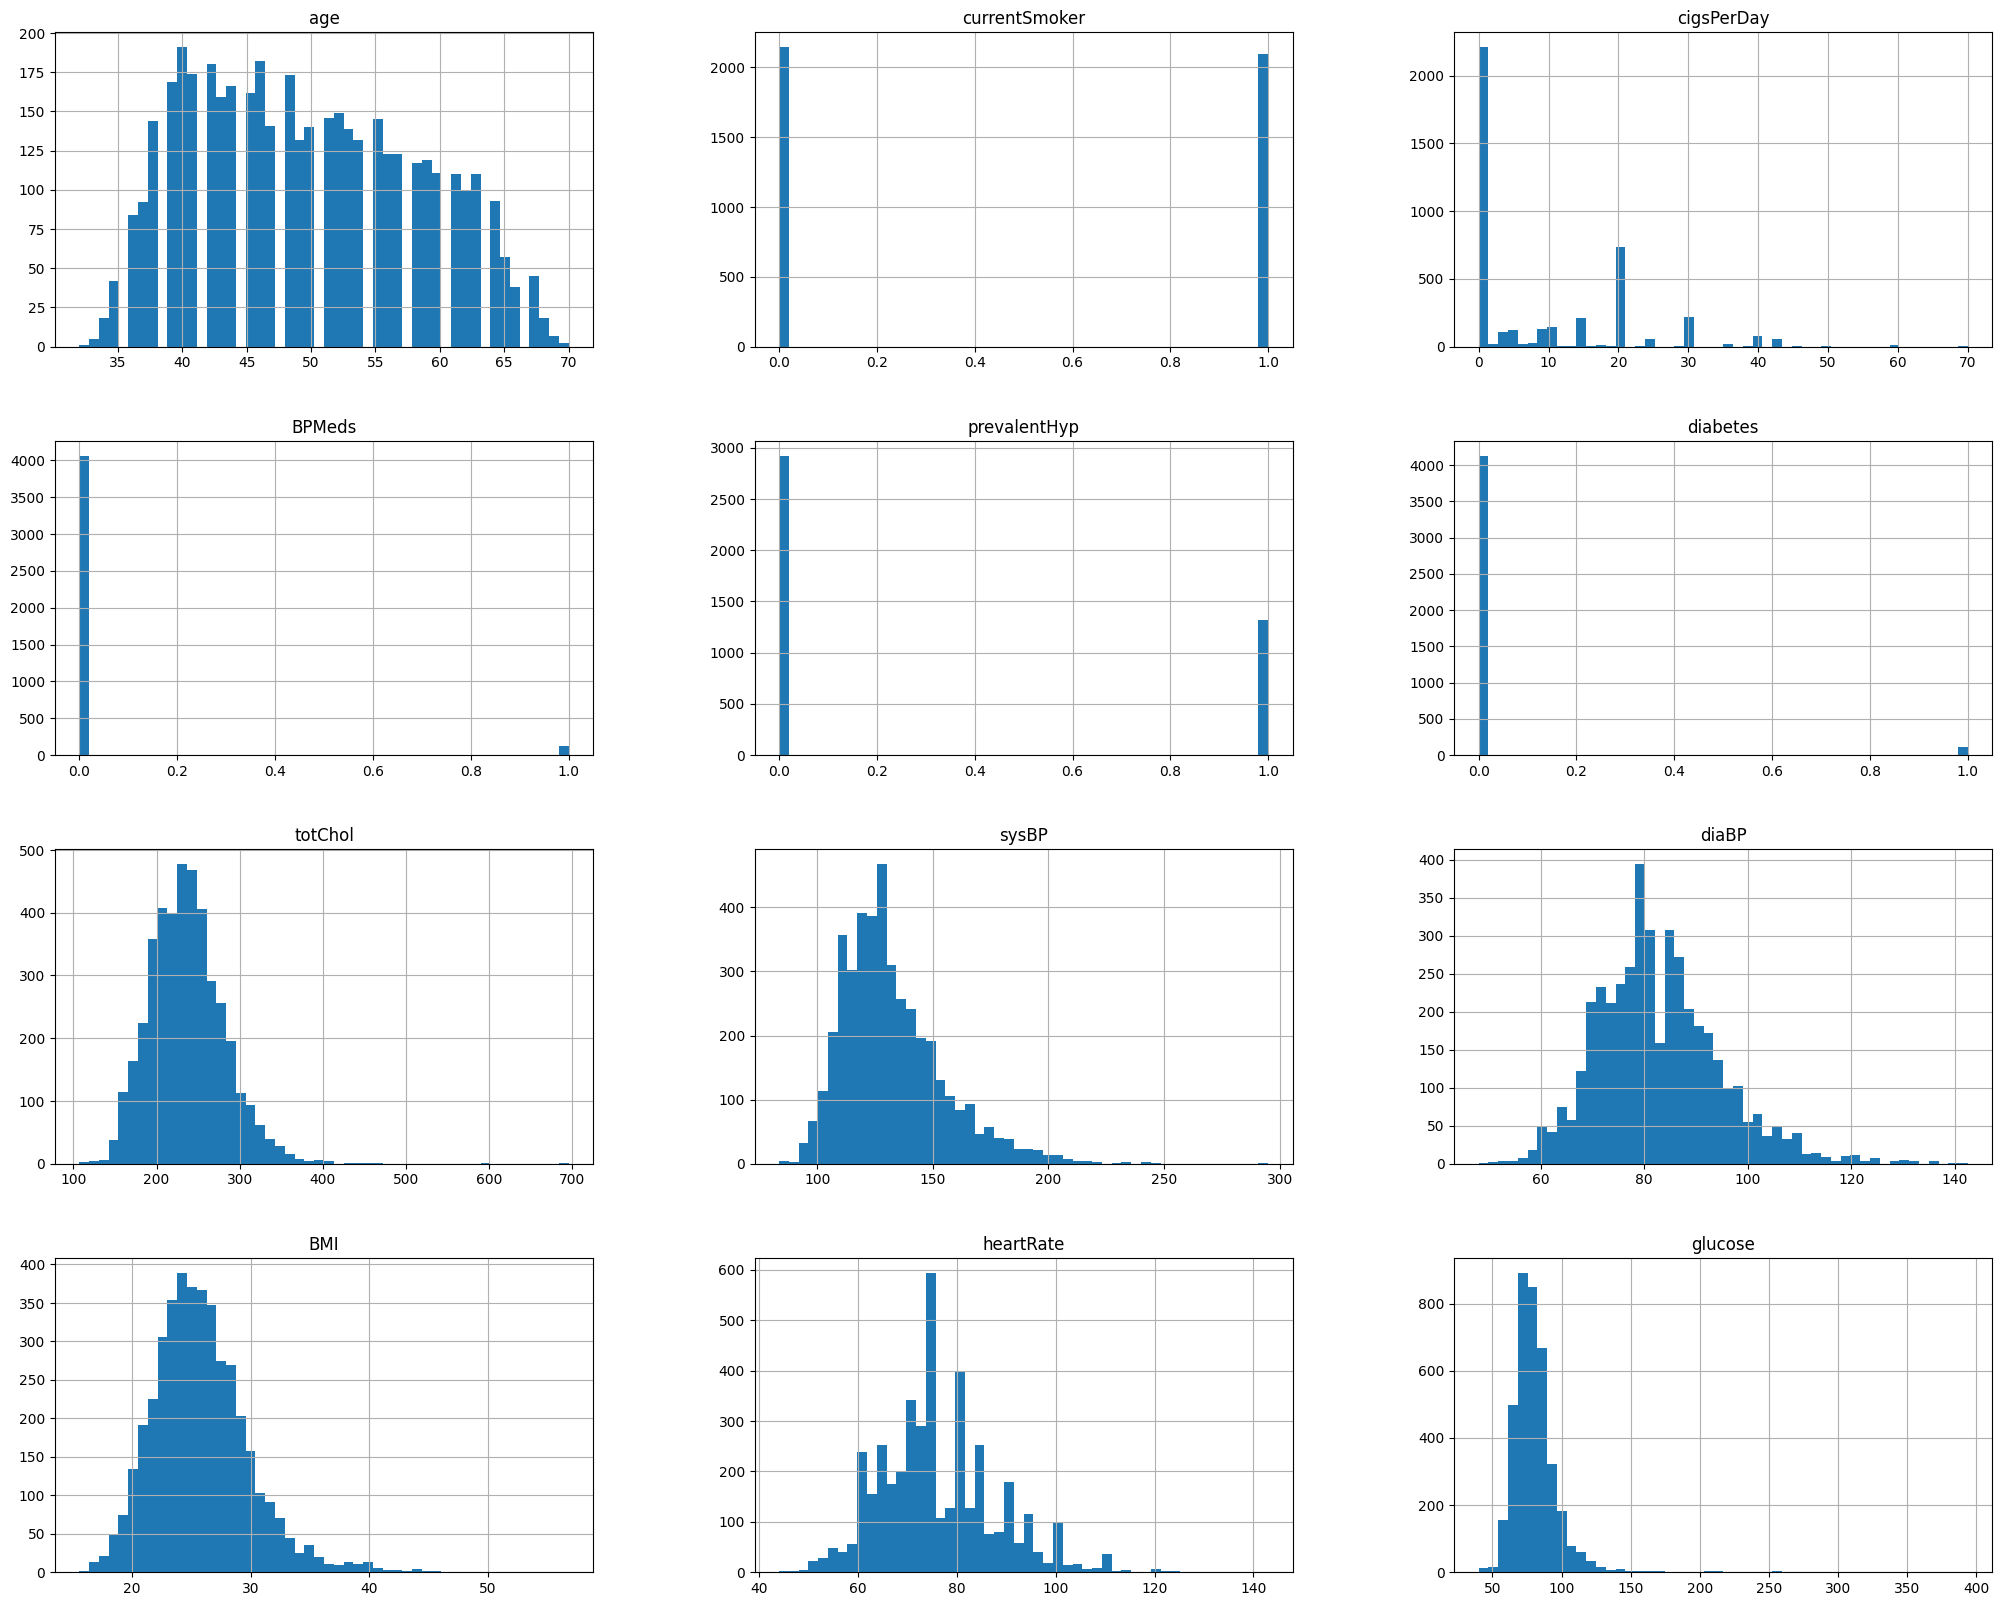

In [56]:
heart_data.hist(bins=50, figsize=(25, 20))
plt.show()

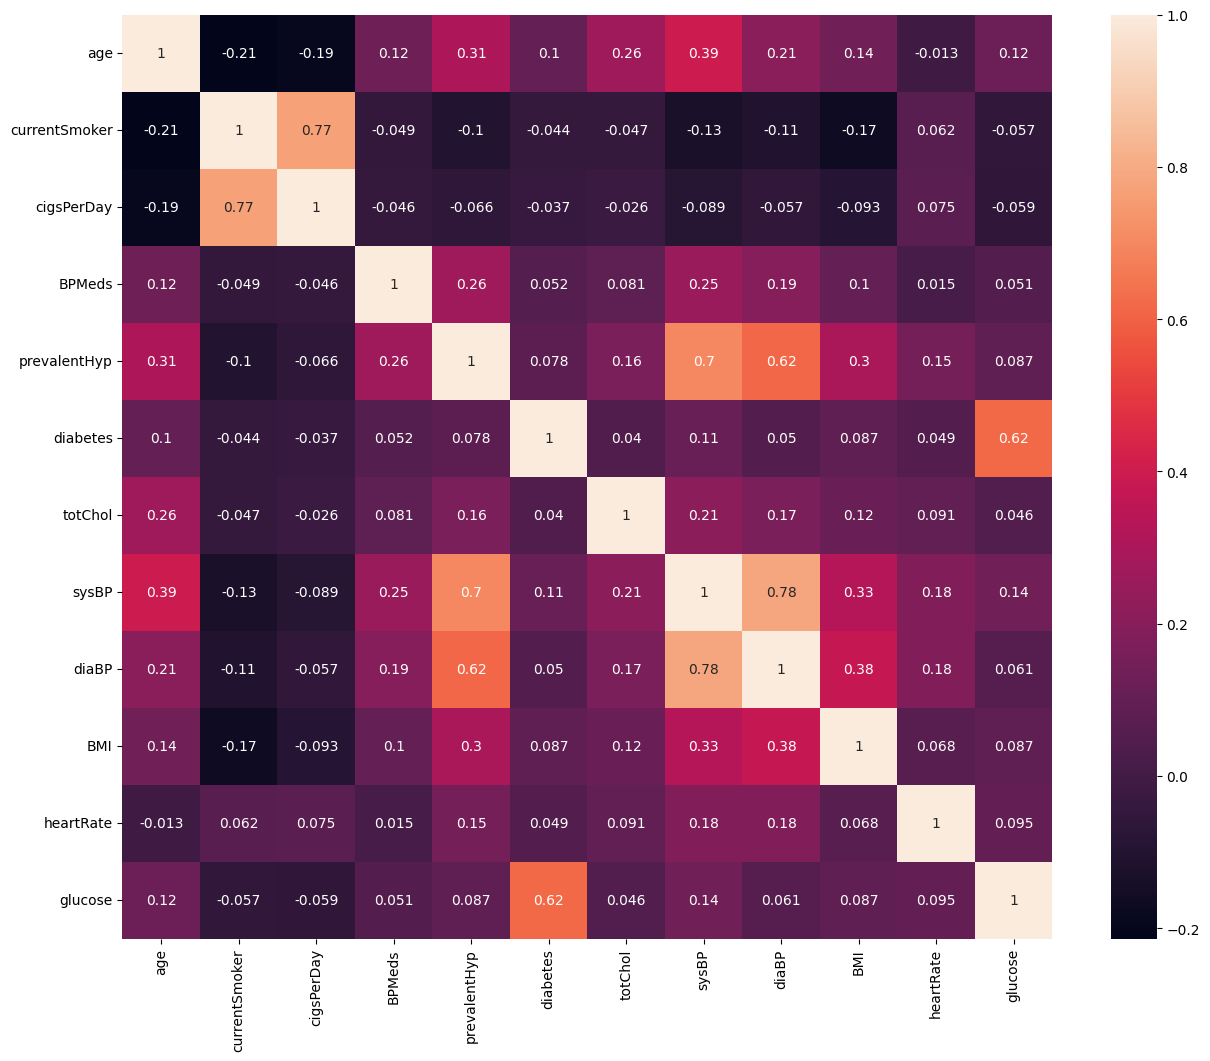

In [57]:
plt.figure(figsize=(15,12))
sns.heatmap(heart_data.corr(), annot=True)
plt.show()

Description: plt.figure allows you to create a new canvas (figure) for plotting visualizations and adjust its properties, such as size, title, and background color.

In [58]:
correlation_matrix = heart_data.corr(method='pearson')
correlation_matrix

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
age,1.000000,-0.213748,-0.192791,0.122995,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256
currentSmoker,-0.213748,1.000000,0.769690,-0.048938,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826
cigsPerDay,-0.192791,0.769690,1.000000,-0.046134,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960
BPMeds,0.122995,-0.048938,-0.046134,1.000000,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176
prevalentHyp,0.307194,-0.103260,-0.066146,0.261187,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834
diabetes,0.101258,-0.044295,-0.037067,0.052047,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627
totChol,0.262131,-0.046562,-0.026320,0.080558,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408
sysBP,0.394302,-0.130230,-0.088780,0.254219,0.696755,0.111283,0.208908,1.000000,0.784002,0.326981,0.182246,0.140621
diaBP,0.206104,-0.107746,-0.056632,0.194227,0.615751,0.050329,0.165182,0.784002,1.000000,0.377588,0.181255,0.061231
BMI,0.135800,-0.167650,-0.092856,0.100668,0.301318,0.087036,0.115767,0.326981,0.377588,1.000000,0.067678,0.087377


Description: The .corr method calculates the correlation coefficients between pairs of columns in a DataFrame. Correlation measures the strength and direction of a linear relationship between two variables.

In [60]:
#checking the distribution of target variable
heart_data['glucose'].value_counts()

75.0     193
77.0     167
73.0     156
80.0     152
70.0     152
        ... 
386.0      1
155.0      1
147.0      1
205.0      1
260.0      1
Name: glucose, Length: 143, dtype: int64

Description: The .value_counts() method calculates the frequency of each unique value in a Series and returns a new Series with the counts, sorted in descending order.

In [61]:
pip install featurewiz

In [62]:
from featurewiz import featurewiz

Description: Featurewiz is designed to automatically handle tasks such as imputing missing values, encoding categorical variables, and selecting relevant features based on their importance for modeling.

In [64]:
target = 'glucose'
features= featurewiz(heart_data, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Regression problem ####
    Loaded train data. Shape = (4238, 16)
    Some column names had special characters which were removed...
#### Single_Label Regression problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################

In [66]:
x = heart_data.drop(columns='glucose', axis=1)
y = heart_data['glucose']

Description: The .drop method allows you to eliminate rows or columns from a DataFrame by specifying their labels or indices. You can drop either rows or columns based on your requirements.

In [67]:
print(x)

      Gender  age      education  currentSmoker  cigsPerDay  BPMeds  \
0       Male   39   postgraduate              0         0.0     0.0   
1     Female   46  primaryschool              0         0.0     0.0   
2       Male   48     uneducated              1        20.0     0.0   
3     Female   61       graduate              1        30.0     0.0   
4     Female   46       graduate              1        23.0     0.0   
...      ...  ...            ...            ...         ...     ...   
4233    Male   50     uneducated              1         1.0     0.0   
4234    Male   51       graduate              1        43.0     0.0   
4235  Female   48  primaryschool              1        20.0     NaN   
4236  Female   44     uneducated              1        15.0     0.0   
4237  Female   52  primaryschool              0         0.0     0.0   

     prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                 no             0         0    195.0  106.0   70.0  

In [68]:
print(y)

0        77.0
1        76.0
2        70.0
3       103.0
4        85.0
        ...  
4233     86.0
4234     68.0
4235     86.0
4236      NaN
4237    107.0
Name: glucose, Length: 4238, dtype: float64


In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

Description: train_test_split takes input data and target labels and divides them into two sets: one for training a model and another for evaluating its performance. The split is typically based on a specified ratio or size for the testing subset.

Usage: Assuming you have input features X and target labels y, you can use train_test_split to create training and testing sets

In [70]:
print(x.shape, x_train.shape, x_test.shape)

(4238, 15) (3390, 15) (848, 15)


In [71]:
from sklearn import model_selection

In [72]:
rf1 = RandomForestClassifier()
rf1.fit(x_train, y_train.ravel())
predictions = rf1.predict(x_test)

print(classification_report(y_test, predictions))
#import result of mse
print("mse=", metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=", metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

ValueError: ignored

Description: The RandomForestClassifier builds multiple decision trees during training and combines their predictions to make accurate and robust classifications. Each tree is trained on a random subset of the data, and the final prediction is determined by a majority vote among the individual trees.

In [ ]:
#Decison Tree
DT1 = DecisionTreeClassifier()
DT1.fit(x_train, y_train.ravel())
predictions1 = DT1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions1))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions1))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions1))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions1))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

Description: The DecisionTreeClassifier constructs a tree-like structure during training to make decisions based on feature values. It splits the data into subsets at each node based on the chosen criteria (e.g., Gini impurity or entropy) and creates a tree of decisions to classify instances.

In [ ]:
# XGB classifier machine object
XGB1 = XGBClassifier()
# train the model on train set
XGB1.fit(x_train, y_train.ravel())
predictions2 = XGB1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions2))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions2))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions2))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions2))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

Description: The XGBClassifier is an implementation of the gradient boosting algorithm using decision trees as base learners. It iteratively builds a strong predictive model by combining multiple weak models (trees) in an additive manner.

In [ ]:
# KNN classifier machine object
KNN1 =  KNeighborsClassifier()
# train the model on train set
KNN1.fit(x_train, y_train.ravel())
predictions3 = KNN1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions3))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions3))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions3))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions3))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions3)))

Description: The KNeighborsClassifier classifies data points based on the class labels of their k nearest neighbors in the feature space. It assigns a label to a new data point by considering the majority class among its k closest neighbors.

In [ ]:
# support vector machine object
svm1 = SVC(kernel='linear')
# train the model on train set
svm1.fit(x_train, y_train.ravel())
predictions4 = svm1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions4))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions4))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions4))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions4))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions4)))

Description: The SVC (Support Vector Classifier) with a linear kernel creates a hyperplane that best separates classes in a linearly separable feature space. It finds the optimal decision boundary by maximizing the margin between classes.

In [ ]:
pip install imblearn

Description: Imbalanced datasets have an unequal distribution of classes, which can lead to biased models. "imbalanced-learn" provides various techniques to address this issue, including resampling methods (oversampling and undersampling), generating synthetic samples, and combining different sampling strategies.

In [ ]:
from imblearn.over_sampling import SMOTE
sm_over = SMOTE(random_state=2)

Description: The SMOTE class is part of the "imbalanced-learn" library and stands for Synthetic Minority Over-sampling Technique. It's a method used to generate synthetic samples for the minority class in imbalanced datasets to balance the class distribution.

In [ ]:
x_train_res, y_train_res = sm_over.fit_resample(x_train, y_train.ravel())

Description: The fit_resample method of the SMOTE class applies the SMOTE algorithm to generate synthetic samples for the minority class and balance the class distribution in the dataset.

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))



print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train== 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

In [ ]:
#Random Forest
rf = RandomForestClassifier(random_state=100)
rf.fit(x_train_res, y_train_res.ravel())
predictions = rf.predict(x_test)
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
#Decison Tree
DT = DecisionTreeClassifier()
DT.fit(x_train_res, y_train_res.ravel())
predictions1 = DT.predict(x_test)
# print classification report
print(classification_report(y_test, predictions1))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions1))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions1))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions1))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions1)))


In [ ]:
# XGB classifier machine object
XGB = XGBClassifier()
# train the model on train set
XGB.fit(x_train_res, y_train_res.ravel())
predictions2 = XGB.predict(x_test)
# print classification report
print(classification_report(y_test, predictions2))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions2))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions2))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions2))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

In [ ]:
# KNN classifier machine object
KNN =  KNeighborsClassifier()
# train the model on train set
KNN.fit(x_train_res, y_train_res.ravel())
predictions3 = KNN.predict(x_test)
# print classification report
print(classification_report(y_test, predictions3))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions3))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions3))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions3))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions3)))

In [ ]:
# support vector machine object
svm = SVC(kernel='linear')
# train the model on train set
svm.fit(x_train_res, y_train_res.ravel())
predictions4 = svm.predict(x_test)
# print classification report
print(classification_report(y_test, predictions4))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions4))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions4))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions4))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions4)))

In [ ]:
#apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

x_train_miss, y_train_miss = nr.fit_resample(x_train, y_train.ravel())

Description: The NearMiss class is part of the "imbalanced-learn" library and is used for under-sampling the majority class in imbalanced datasets. It aims to balance class distribution by reducing the number of majority class instances.

The .fit_resample method is typically used with resampling classes from libraries like "imbalanced-learn" to apply a specific resampling technique to the data. It fits the resampling technique to the data and generates a new dataset with a balanced class distribution.

In [ ]:
#Near miss result
print('After undersampling, the shape of train_X: {}'.format(x_train_miss.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_miss.shape))




print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {}".format(sum(y_train == 0)))
print("After UnderSampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

In [ ]:
#Random Forest
rf2 = RandomForestClassifier(random_state=100)
rf2.fit(x_train_miss, y_train_miss.ravel())
predictions = rf2.predict(x_test)
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
#Decison Tree
DT2 = DecisionTreeClassifier()
DT2.fit(x_train_miss, y_train_miss.ravel())
predictions1 = DT2.predict(x_test)
# print classification report
print(classification_report(y_test, predictions1))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions1))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions1))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions1))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

In [ ]:
# XGB classifier machine object
XGB2 = XGBClassifier()
# train the model on train set
XGB2.fit(x_train_miss, y_train_miss.ravel())
predictions2 = XGB2.predict(x_test)
# print classification report
print(classification_report(y_test, predictions2))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions2))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions2))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions2))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

In [ ]:
# KNN classifier machine object
KNN2 =  KNeighborsClassifier()
# train the model on train set
KNN2.fit(x_train_miss, y_train_miss.ravel())
predictions3 = KNN2.predict(x_test)
# print classification report
print(classification_report(y_test, predictions3))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions3))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions3))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions3))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions3)))

In [ ]:
# support vector machine object
svm2 = SVC(kernel='linear')
# train the model on train set
svm2.fit(x_train_miss, y_train_miss.ravel())
predictions4 = svm2.predict(x_test)
# print classification report
print(classification_report(y_test, predictions4))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions4))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions4))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions4))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions4)))

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

Precision-Recall Curve: A graphical representation showing how precision and recall change as the classification threshold varies.
Accuracy Score: Calculates the proportion of correct predictions (both true positives and true negatives) out of all predictions.
Recall Score: Computes the ratio of true positive predictions to all actual positive instances.
Precision Score: Measures the proportion of true positive predictions to all positive predictions made by the model.
F1 Score: A single metric that combines precision and recall using the harmonic mean, providing a balanced measure.

In [ ]:
# support vector machine object
svm = SVC(kernel='linear')
# train the model on train set
svm.fit(x_train_res, y_train_res.ravel())
predictions4 = svm.predict(x_test)
# print classification report
print(classification_report(y_test, predictions4))

Description: The .fit method takes as input the features (X) and corresponding target labels (y) and trains the model to learn patterns and relationships in the data. During training, the model adjusts its parameters to minimize the prediction error.
The .ravel() method is applied to a two-dimensional array (such as a target variable) to reshape it into a one-dimensional array. This is often used to ensure compatibility with certain functions or algorithms that expect one-dimensional input.
The .predict method takes a set of input features and returns predicted class labels based on the learned SVM model. It assigns each input instance to one of the classes based on the SVM's decision boundary.

In [ ]:
Accuracy=accuracy_score(y_test, predictions4)
precision=precision_score(y_test, predictions4)
recall=recall_score(y_test, predictions4)
f1=f1_score(y_test, predictions4)
print('Accuracy=',Accuracy)
print('precision=',precision)
print('recall=',recall)
print('f1=',f1)

Description: The accuracy_score function calculates the ratio of correctly predicted instances to the total number of instances in a classification task. It provides an overall measure of how well the model's predictions match the true labels.
The precision_score function calculates the ratio of true positive predictions to the sum of true positive and false positive predictions. It quantifies the accuracy of positive predictions, helping to minimize false positive rates.
The recall_score function calculates the ratio of true positive predictions to the sum of true positive and false negative predictions. It quantifies the model's ability to correctly identify positive instances.
The f1_score function calculates the harmonic mean of precision and recall. It provides a single value that considers both false positives and false negatives, making it a balanced measure of a model's performance.

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions4)

plt.figure(figsize = (10, 8))
plt.plot([0, 1], [0.5, 0.5], 'k--')
plt.plot(recall, precision, label = 'svm')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('smv) PRC curve')
plt.show()

Description: The precision_recall_curve function computes precision and recall values at various probability thresholds for classifying positive instances. It provides a way to visualize how precision and recall change as the decision threshold varies.

In [ ]:
y = y_test
yhat = predictions4
x = list(range(len(y)))

plt.scatter(x, y, color="blue", label="original")
plt.plot(x, yhat, color="red", label="predicted")
plt.legend()
plt.show()

plt.scatter: Creates a scatter plot showing data points as individual points.
plt.plot: Generates a line or marker plot to visualize data trends.
plt.legend: Adds a legend to the plot, labeling elements.
plt.show: Displays the created plot on the screen.

In [ ]:
input_data = (62,0,0)

#change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = svm.predict(input_data_reshaped)
print(prediction)

if(prediction[0]== 0):
  print('The person does not have a heart disease')
else:
  print('The person has heart disease')

.asarray: Converts input data (e.g., a list or another array-like object) into a NumPy array.

.reshape: Changes the shape of an array without altering the data, allowing you to organize it differently (e.g., from 1D to 2D).

.predict: Applies a trained machine learning model to input data and generates predictions based on learned patterns.

In [ ]:
import pickle

filename= 'heart_disease_model.sav'
pickle.dump(XGB, open(filename, 'wb'))

#loding the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Description: The pickle module in Python is used for serializing (pickling) and deserializing (unpickling) Python objects. It allows you to save and load complex data structures, such as lists, dictionaries, and even custom objects, in a binary format.
.sav: A file extension indicating a saved machine learning model.
.dump: To serialize and save Python objects to a file.
.load: To deserialize and retrieve Python objects from a file.

In [ ]:
input_data = (1,52,100)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf1.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('Hard disease Affected')
else:
  print('Not affected')

In [ ]:
lr = LogisticRegression(max_iter=100, random_state=42)

# Performing cross-validation and getting accuracy scores
cv_scores_lr = cross_val_score(lr, x_train, y_train, cv=5)

# Calculating mean accuracy and rounding to two decimal places
mean_accuracy_lr = np.mean(cv_scores_lr) * 100
mean_accuracy_lr = round(mean_accuracy_lr, 2)

# Printing the cross-validation scores and mean accuracy
print("Cross-validation Scores:", cv_scores_lr)
print("Mean Accuracy (%):", mean_accuracy_lr)

In [ ]:
lr = LogisticRegression(max_iter=60, random_state=42)

# Performing cross-validation and getting accuracy scores
cv_scores_lr = cross_val_score(lr, x_train_res, y_train_res, cv=4)

# Calculating mean accuracy and rounding to two decimal places
mean_accuracy_lr = np.mean(cv_scores_lr) * 100
mean_accuracy_lr = round(mean_accuracy_lr, 2)

# Printing the cross-validation scores and mean accuracy
print("Cross-validation Scores:", cv_scores_lr)
print("Mean Accuracy (%):", mean_accuracy_lr)

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Creating a KFold object with k=5 (5-fold cross-validation)
kfold = KFold(n_splits=10)

# Performing cross-validation and getting accuracy scores
scores = cross_val_score(rf, x_train_res, y_train_res, cv=kfold)

# Printing the accuracy scores for each fold
for fold, score in enumerate(scores):
    print(f"Fold {fold+1} Accuracy: {score}")

# Printing the mean accuracy across all folds
mean_accuracy = np.mean(scores)
print("Mean Accuracy:", mean_accuracy)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the grid search object
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", accuracy)